# Product Price Optimization with TS Forecasting

In [289]:
import pandas as pd
df = pd.read_csv("Sales_Product_Combined.csv")
df

,Order ID,Product,Quantity Ordered,Price,Order Date,Time,Purchase Address,City,Product Type
0,176558,USB-C Charging Cable,2,11.95,19-04-2019,8:46 AM,"917 1st St, Dallas, TX 75001",Dallas,Cable
1,176559,Bose SoundSport Headphones,1,99.99,07-04-2019,10:30 PM,"682 Chestnut St, Boston, MA 02215",Boston,Headphones
2,176560,Google Phone,1,600,12-04-2019,2:38 PM,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Phone
3,176560,Wired Headphones,1,11.99,12-04-2019,2:38 PM,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Headphones
4,176561,Wired Headphones,1,11.99,30-04-2019,9:27 AM,"333 8th St, Los Angeles, CA 90001",Los Angeles,Headphones
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,17-09-2019,8:56 PM,"840 Highland St, Los Angeles, CA 90001",Los Angeles,Batteries
185946,259354,iPhone,1,700,01-09-2019,4:00 PM,"216 Dogwood St, San Francisco, CA 94016",San Francisco,iPhone
185947,259355,iPhone,1,700,23-09-2019,7:39 AM,"220 12th St, San Francisco, CA 94016",San Francisco,iPhone
185948,259356,34in Ultrawide Monitor,1,379.99,19-09-2019,5:30 PM,"511 Forest St, San Francisco, CA 94016",San Francisco,Monitor


In [290]:
df.drop_duplicates()

,Order ID,Product,Quantity Ordered,Price,Order Date,Time,Purchase Address,City,Product Type
0,176558,USB-C Charging Cable,2,11.95,19-04-2019,8:46 AM,"917 1st St, Dallas, TX 75001",Dallas,Cable
1,176559,Bose SoundSport Headphones,1,99.99,07-04-2019,10:30 PM,"682 Chestnut St, Boston, MA 02215",Boston,Headphones
2,176560,Google Phone,1,600,12-04-2019,2:38 PM,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Phone
3,176560,Wired Headphones,1,11.99,12-04-2019,2:38 PM,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Headphones
4,176561,Wired Headphones,1,11.99,30-04-2019,9:27 AM,"333 8th St, Los Angeles, CA 90001",Los Angeles,Headphones
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,17-09-2019,8:56 PM,"840 Highland St, Los Angeles, CA 90001",Los Angeles,Batteries
185946,259354,iPhone,1,700,01-09-2019,4:00 PM,"216 Dogwood St, San Francisco, CA 94016",San Francisco,iPhone
185947,259355,iPhone,1,700,23-09-2019,7:39 AM,"220 12th St, San Francisco, CA 94016",San Francisco,iPhone
185948,259356,34in Ultrawide Monitor,1,379.99,19-09-2019,5:30 PM,"511 Forest St, San Francisco, CA 94016",San Francisco,Monitor


In [291]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [292]:
df['Price'] = df['Price'].str.replace(',', '')

In [293]:
#set price col to float types, and create total sales col 
df['Price'] = df['Price'].astype(float)
df['Total Sales'] = df['Quantity Ordered'] * df['Price']
df.head()

,Order ID,Product,Quantity Ordered,Price,Order Date,Time,Purchase Address,City,Product Type,Total Sales
0,176558,USB-C Charging Cable,2,11.95,19-04-2019,8:46 AM,"917 1st St, Dallas, TX 75001",Dallas,Cable,23.90
1,176559,Bose SoundSport Headphones,1,99.99,07-04-2019,10:30 PM,"682 Chestnut St, Boston, MA 02215",Boston,Headphones,99.99
2,176560,Google Phone,1,600.00,12-04-2019,2:38 PM,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Phone,600.00
3,176560,Wired Headphones,1,11.99,12-04-2019,2:38 PM,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,Headphones,11.99
4,176561,Wired Headphones,1,11.99,30-04-2019,9:27 AM,"333 8th St, Los Angeles, CA 90001",Los Angeles,Headphones,11.99


/var/folders/k3/26jsdq196ndg3f6tbwkyr30h0000gn/T/ipykernel_57713/770796567.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  DataSet1 = df[pd.to_datetime(df['Order Date']) < split_date]
/var/folders/k3/26jsdq196ndg3f6tbwkyr30h0000gn/T/ipykernel_57713/770796567.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  DataSet2 = df[pd.to_datetime(df['Order Date']) >= split_date]


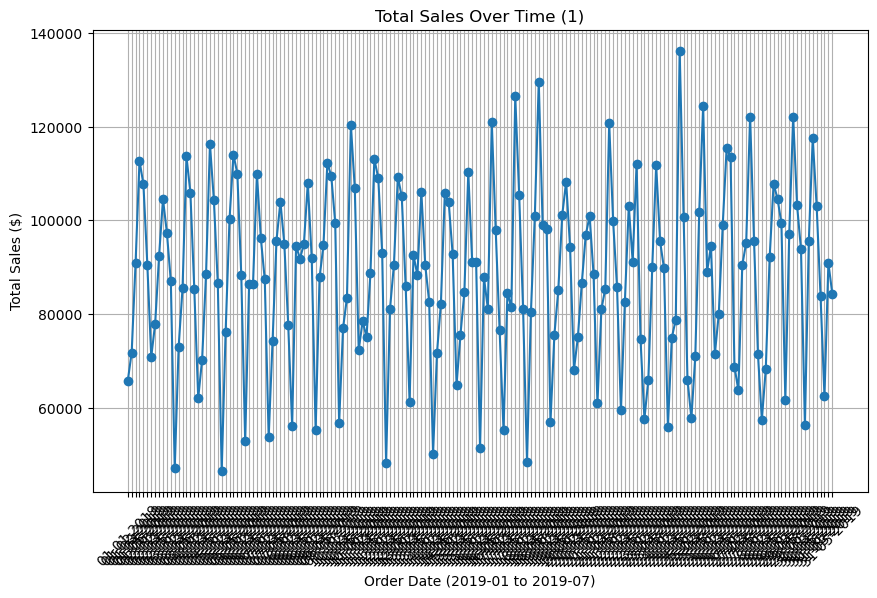

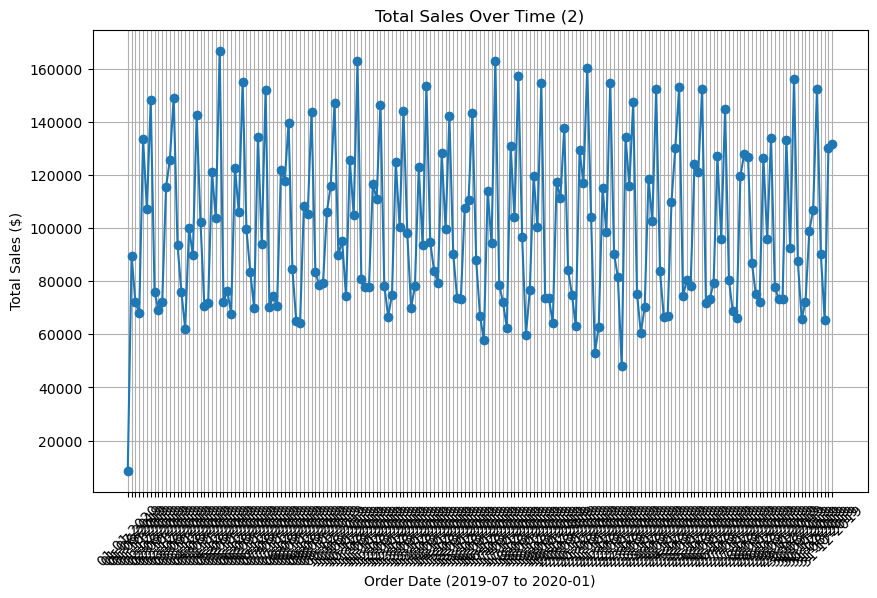

In [294]:
#data visualization - line charts total sales vs time on split datasets
from matplotlib import pyplot as plt

#split the datasets
split_date = pd.Timestamp('2019-07-01')

DataSet1 = df[pd.to_datetime(df['Order Date']) < split_date]
DataSet2 = df[pd.to_datetime(df['Order Date']) >= split_date]

#plot data set 1
sales_over_time_1 = DataSet1.groupby('Order Date')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time_1.index, sales_over_time_1.values, marker='o', linestyle='-')
plt.title('Total Sales Over Time (1)')
plt.xlabel('Order Date (2019-01 to 2019-07)')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(True)
plt.show()

#plot data set 2
sales_over_time_2 = DataSet2.groupby('Order Date')['Total Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time_2.index, sales_over_time_2.values, marker='o', linestyle='-')
plt.title('Total Sales Over Time (2)')
plt.xlabel('Order Date (2019-07 to 2020-01)')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(True)
plt.show()


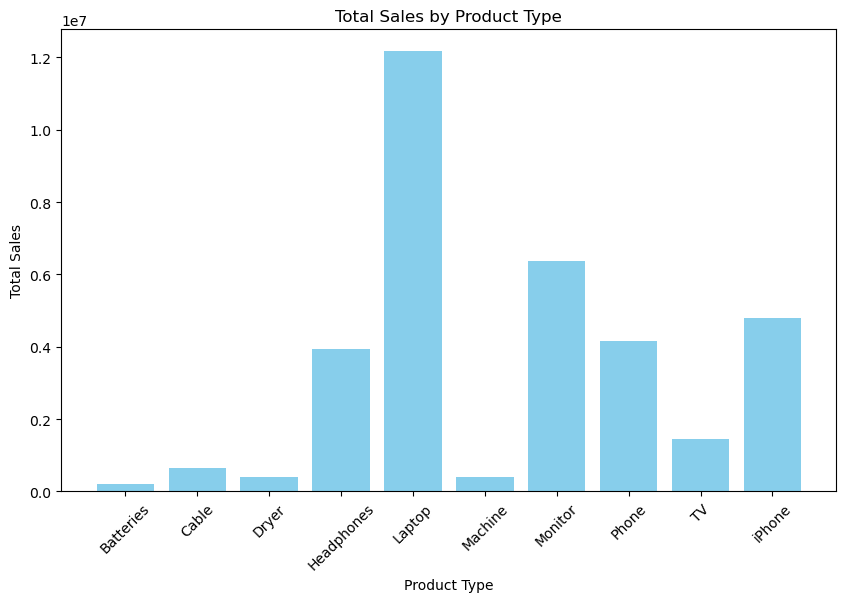

In [295]:
#data visualization - bar chart total sales for each product type for entire data set
product_sales_sum = df.groupby('Product Type')['Total Sales'].sum()

#plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(product_sales_sum.index, product_sales_sum.values, color='skyblue')
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

In [296]:
import matplotlib.pyplot as plt

In [297]:
# Select only the 'Price' and 'Product Type' columns
selected_data = df[['Price', 'Product Type']]

print(selected_data.head())

    Price Product Type
0   11.95        Cable
1   99.99   Headphones
2  600.00        Phone
3   11.99   Headphones
4   11.99   Headphones


In [298]:
# Group by 'Product Type' and sum the prices
grouped_data = selected_data.groupby('Product Type').sum().reset_index()

In [299]:
print(grouped_data.head())

  Product Type        Price
0    Batteries    140732.27
1        Cable    585527.95
2        Dryer    387600.00
3   Headphones   3891111.93
4       Laptop  12158758.72


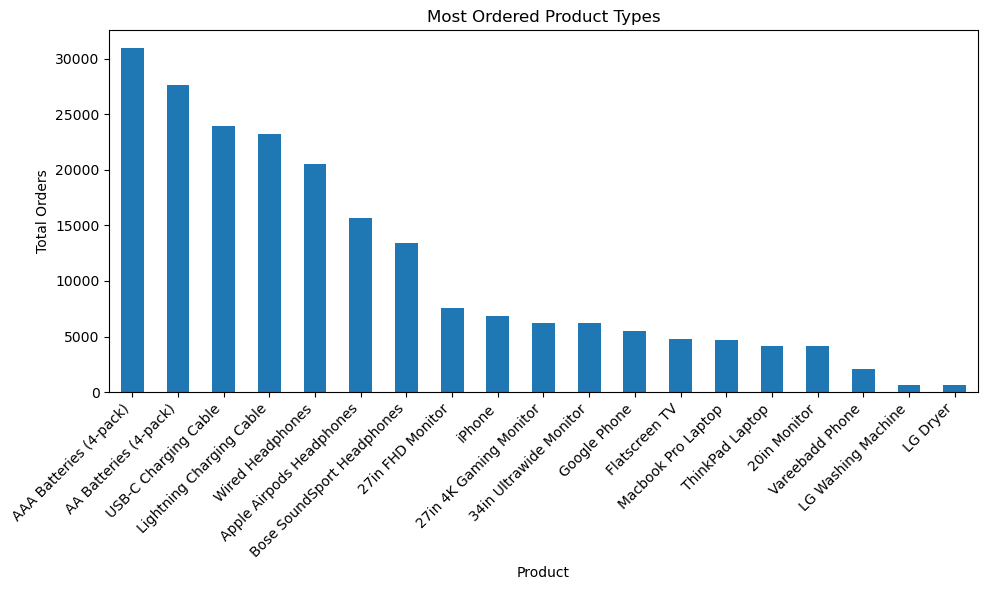

In [300]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
# Assuming the dataset is named "sales_data.csv" and is in the same directory as this script
sales_data = pd.read_csv("Sales_Product_Combined.csv")

# Assuming the column containing product types is named "Product_Type"
# Assuming the column containing order counts is named "Order_Count"
product_types = sales_data['Product']
order_counts = sales_data['Quantity Ordered']

# Sum the order counts for each product type
product_counts = sales_data.groupby('Product')['Quantity Ordered'].sum()

# Sort the product counts in descending order
product_counts = product_counts.sort_values(ascending=False)

# Plotting the histogram
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Most Ordered Product Types')
plt.xlabel('Product')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

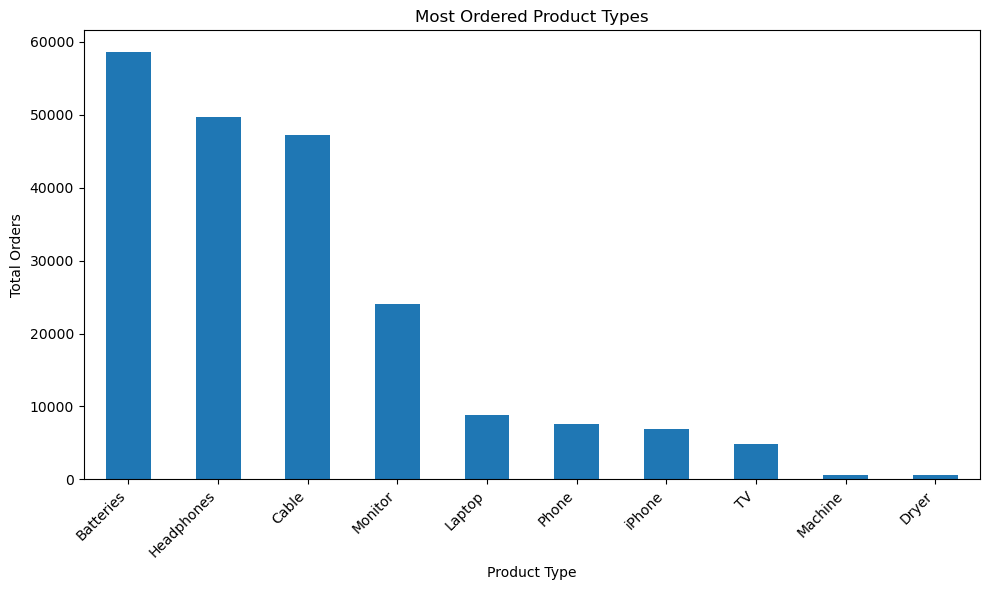

In [301]:


# Assuming the column containing product types is named "Product_Type"
# Assuming the column containing order counts is named "Order_Count"
product_types = sales_data['Product Type']
order_counts = sales_data['Quantity Ordered']

# Sum the order counts for each product type
product_counts = sales_data.groupby('Product Type')['Quantity Ordered'].sum()

# Sort the product counts in descending order
product_counts = product_counts.sort_values(ascending=False)

# Plotting the histogram
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Most Ordered Product Types')
plt.xlabel('Product Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [302]:


# Convert 'Order Date' column to datetime, specifying dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Create a new column with month-year format
df['Month-Year'] = df['Order Date'].dt.to_period('M')

# Print the modified dataframe
print(df.head())


   Order ID                     Product  Quantity Ordered   Price Order Date  \
0    176558        USB-C Charging Cable                 2   11.95 2019-04-19   
1    176559  Bose SoundSport Headphones                 1   99.99 2019-04-07   
2    176560                Google Phone                 1  600.00 2019-04-12   
3    176560            Wired Headphones                 1   11.99 2019-04-12   
4    176561            Wired Headphones                 1   11.99 2019-04-30   

       Time                      Purchase Address          City Product Type  \
0   8:46 AM          917 1st St, Dallas, TX 75001        Dallas        Cable   
1  10:30 PM     682 Chestnut St, Boston, MA 02215        Boston   Headphones   
2   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles        Phone   
3   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles   Headphones   
4   9:27 AM     333 8th St, Los Angeles, CA 90001   Los Angeles   Headphones   

   Total Sales  Month  Year Month-Year

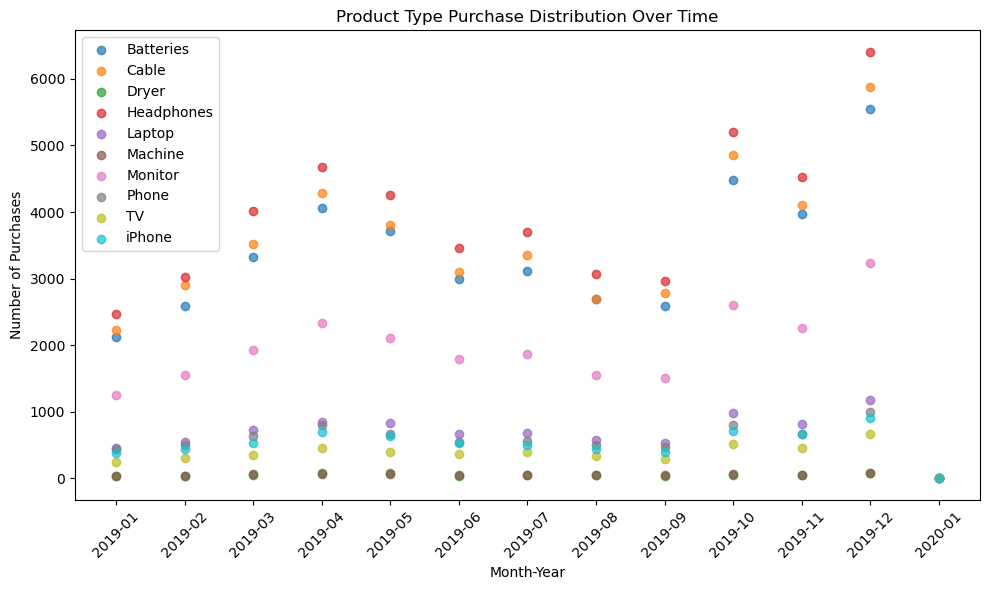

In [303]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sales_Product_Combined.csv")

# Convert 'Order Date' column to datetime, specifying dayfirst=True
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Create a new column with month-year format
df['Month-Year'] = df['Order Date'].dt.to_period('M')

# Group by 'Month-Year' and 'Product Type' and count occurrences
monthly_product_counts = df.groupby(['Month-Year', 'Product Type']).size().reset_index(name='Count')

# Convert 'Month-Year' to string for plotting
monthly_product_counts['Month-Year'] = monthly_product_counts['Month-Year'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
for product_type in monthly_product_counts['Product Type'].unique():
    product_data = monthly_product_counts[monthly_product_counts['Product Type'] == product_type]
    plt.scatter(product_data['Month-Year'], product_data['Count'], label=product_type, alpha=0.7)

plt.title('Product Type Purchase Distribution Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


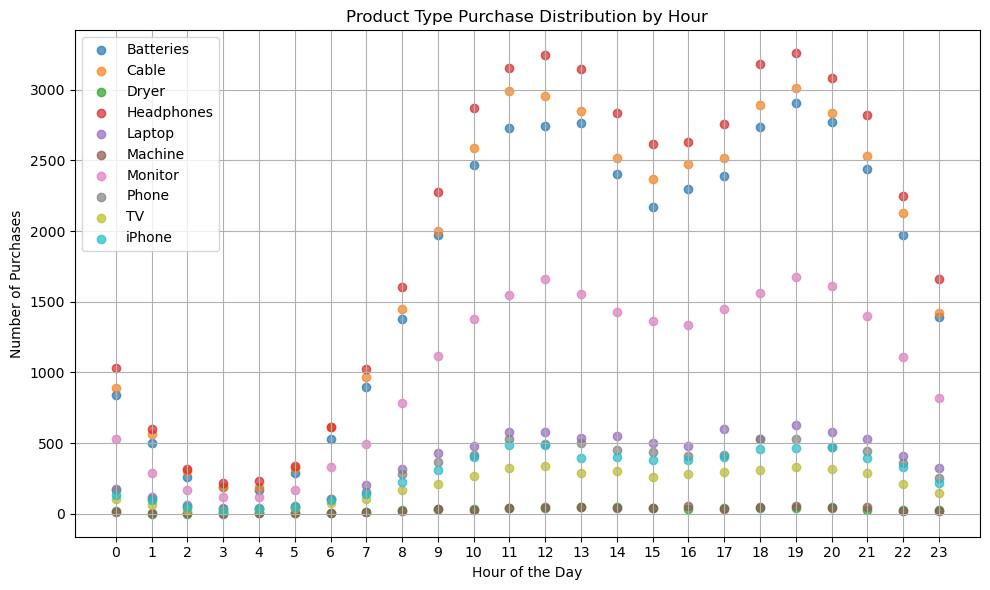

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Sales_Product_Combined.csv")

# Convert 'Time' column to datetime, specifying the format
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')

# Round down the time to the nearest hour
df['Hour'] = df['Time'].dt.floor('H').dt.hour

# Group by 'Hour' and 'Product Type' and count occurrences
hourly_product_counts = df.groupby(['Hour', 'Product Type']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(10, 6))
for product_type in hourly_product_counts['Product Type'].unique():
    product_data = hourly_product_counts[hourly_product_counts['Product Type'] == product_type]
    plt.scatter(product_data['Hour'], product_data['Count'], label=product_type, alpha=0.7)

plt.title('Product Type Purchase Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.xticks(range(24))  # Ensure ticks for all hours
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [305]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Sales_Product_Combined.csv")

# Split the "Purchase Address" column by commas and extract the state (last element)
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[-1])

# Print the modified dataframe
print(df.head())


   Order ID                     Product  Quantity Ordered  Price  Order Date  \
0    176558        USB-C Charging Cable                 2  11.95  19-04-2019   
1    176559  Bose SoundSport Headphones                 1  99.99  07-04-2019   
2    176560                Google Phone                 1    600  12-04-2019   
3    176560            Wired Headphones                 1  11.99  12-04-2019   
4    176561            Wired Headphones                 1  11.99  30-04-2019   

       Time                      Purchase Address          City Product Type  \
0   8:46 AM          917 1st St, Dallas, TX 75001        Dallas        Cable   
1  10:30 PM     682 Chestnut St, Boston, MA 02215        Boston   Headphones   
2   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles        Phone   
3   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles   Headphones   
4   9:27 AM     333 8th St, Los Angeles, CA 90001   Los Angeles   Headphones   

      State  
0  TX 75001  
1  MA 0221

In [306]:


# Split the "Purchase Address" column by commas and extract the state and zipcode
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[-1].replace(' ', ', '))

# Print the modified dataframe
print(df.head())



   Order ID                     Product  Quantity Ordered  Price  Order Date  \
0    176558        USB-C Charging Cable                 2  11.95  19-04-2019   
1    176559  Bose SoundSport Headphones                 1  99.99  07-04-2019   
2    176560                Google Phone                 1    600  12-04-2019   
3    176560            Wired Headphones                 1  11.99  12-04-2019   
4    176561            Wired Headphones                 1  11.99  30-04-2019   

       Time                      Purchase Address          City Product Type  \
0   8:46 AM          917 1st St, Dallas, TX 75001        Dallas        Cable   
1  10:30 PM     682 Chestnut St, Boston, MA 02215        Boston   Headphones   
2   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles        Phone   
3   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles   Headphones   
4   9:27 AM     333 8th St, Los Angeles, CA 90001   Los Angeles   Headphones   

       State  
0  TX, 75001  
1  MA, 0

In [307]:


# Split the "Purchase Address" column by commas and extract only the state
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[-1].split(' ')[0])

# Print the modified dataframe
print(df.head())


   Order ID                     Product  Quantity Ordered  Price  Order Date  \
0    176558        USB-C Charging Cable                 2  11.95  19-04-2019   
1    176559  Bose SoundSport Headphones                 1  99.99  07-04-2019   
2    176560                Google Phone                 1    600  12-04-2019   
3    176560            Wired Headphones                 1  11.99  12-04-2019   
4    176561            Wired Headphones                 1  11.99  30-04-2019   

       Time                      Purchase Address          City Product Type  \
0   8:46 AM          917 1st St, Dallas, TX 75001        Dallas        Cable   
1  10:30 PM     682 Chestnut St, Boston, MA 02215        Boston   Headphones   
2   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles        Phone   
3   2:38 PM  669 Spruce St, Los Angeles, CA 90001   Los Angeles   Headphones   
4   9:27 AM     333 8th St, Los Angeles, CA 90001   Los Angeles   Headphones   

  State  
0    TX  
1    MA  
2    CA 

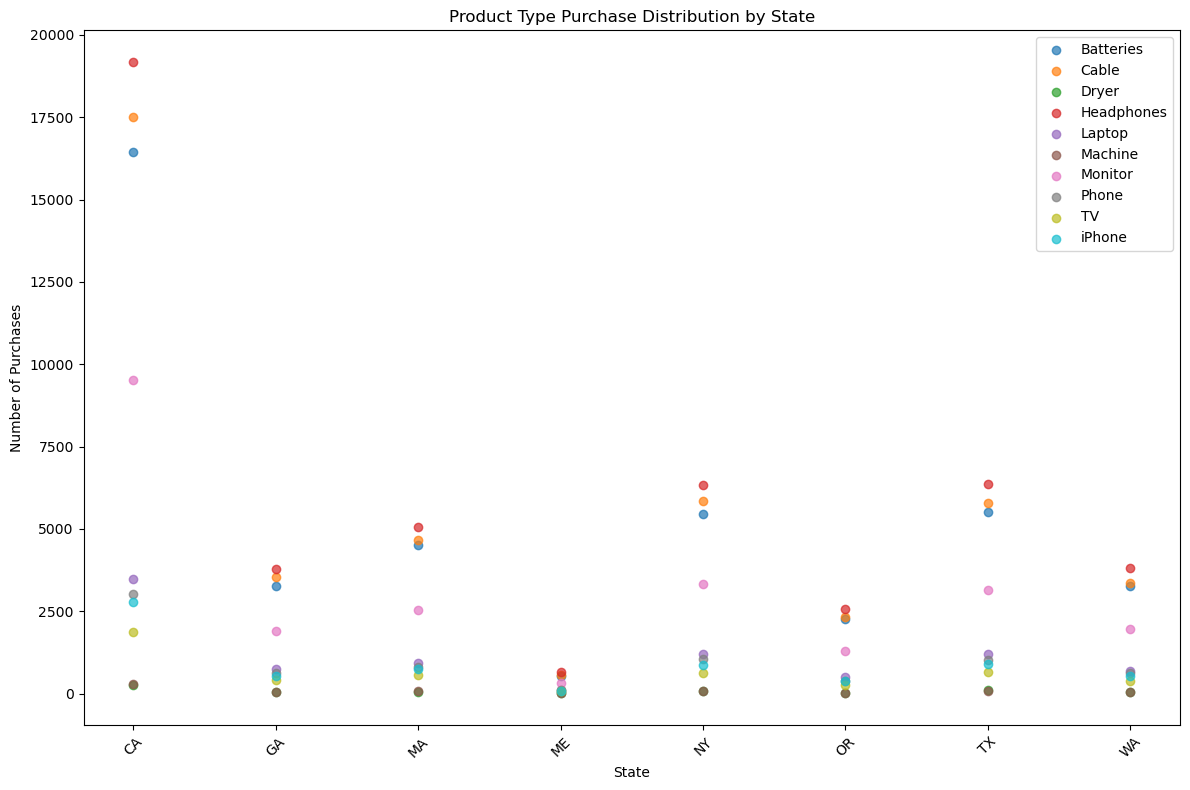

In [308]:

# Split the "Purchase Address" column by commas and extract only the state
df['State'] = df['Purchase Address'].apply(lambda x: x.split(', ')[-1].split(' ')[0])

# Group by 'State' and 'Product Type' and count occurrences
state_product_counts = df.groupby(['State', 'Product Type']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 8))
for product_type in state_product_counts['Product Type'].unique():
    product_data = state_product_counts[state_product_counts['Product Type'] == product_type]
    plt.scatter(product_data['State'], product_data['Count'], label=product_type, alpha=0.7)

plt.title('Product Type Purchase Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [309]:
df['DateTime'] = pd.to_datetime(df['Order Date'] + ' ' + df['Time'], dayfirst = True)
df['Day of Week'] = df['DateTime'].dt.day_name()
df['Total Cost per Order'] = pd.to_numeric(df['Price']) * pd.to_numeric(df['Quantity Ordered'])
df

ValueError: Unable to parse string "1,700.00" at position 8

In [ ]:
# Group by day of the week and sum total cost for each day
total_sales_per_day = df.groupby('Day of Week')['Total Cost per Order'].sum().reset_index()

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Day of Week', y='Total Cost per Order', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Sales for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['Month'] = df['DateTime'].dt.month
df

total_sales_per_month = df.groupby('Month')['Total Cost per Order'].sum().reset_index()

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='Total Cost per Order', data=df)
plt.title('Monthly Distribution of Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(0, 12), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.dropna(subset=['Price', 'Quantity Ordered'], inplace=True)

pivot_table = df.pivot_table(index='Product Type', columns='Day of Week', values='Total Cost per Order', aggfunc='sum')

correlation_matrix = pivot_table.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f",linewidths=0.5 )
plt.title('Correlation Matrix of Total Sales per Product Type and Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Product Type')
plt.show()